In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# action model, we have position and velocity in 2-D(x,y)
position = np.array([0., 0.], dtype=float)
velocity = np.array([1., 2.], dtype=float)

x = np.array([position, \
              velocity])
p = np.array([[0., 0.],[0., 0.]])
Q = 5

n_iter = 10
x_array = np.zeros((n_iter,2,2))

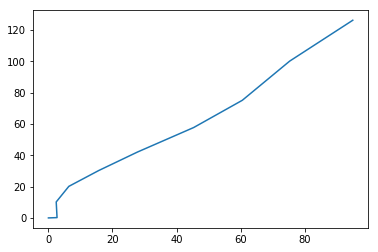

In [3]:
def systemAction(x_now, p_now, dt):
    
    #0.1 calculate x
    Fk = np.array([[1., dt],  \
                   [0., 1.]])
    u = np.array([2.,3.], dtype=float)
    Bk = np.array([[dt*dt/2.],  \
                   [dt]])
    
    x_next_k = np.dot(Fk, x_now) + Bk * u
    
    #0.2 calculate Pk
    Pk = p_now
    Pk_next_k = Fk * Pk * Fk.T + Q
    
    #0.3 update
    u = np.random.normal(loc=x_next_k, scale=2, size=None)
    Rk = 2
    K = Pk_next_k/(Pk_next_k + Rk)
    x_next = x_next_k + K*(u - x_next_k)
    Pk_next = Pk_next_k - K*Pk_next_k
    
    return x_next, Pk_next

# n_iter
for k in range(0, n_iter):
    x_array[k] = x
    x, p = systemAction(x, p, 1)

position_array = x_array[:,0:1]
position_array = position_array.reshape(n_iter,2)
velocity_array = x_array[:,1]


position_array_x = position_array[:, 0]
position_array_y = position_array[:, 1]

plt.plot(position_array_x, position_array_y)
plt.show()